# 1 LOAD LIBRARY

In [ ]:
# Xử lý thời gian và dữ liệu
from datetime import datetime
import pandas as pd
import numpy as np

# Thống kê và phân tích
import random
from scipy.stats import (chi2, chi2_contingency, zscore, ttest_1samp, ttest_ind, levene, kstest, mannwhitneyu, ttest_rel, norm, rankdata, kruskal, pearsonr, spearmanr)
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Làm việc với Google Sheets
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
drive.mount('/content/drive')
from google.auth import default
from google.colab import auth

# Cài đặt hiển thị rộng hơn cho DataFrame
pd.set_option('display.width', 1000)  # Độ rộng tối đa
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2 READ DATA
About Dataset:
Marketing Mix Modeling (MMM) is a statistical analysis technique used to evaluate the effectiveness of various marketing activities and their impact on sales or other key performance indicators (KPIs). It helps businesses understand how elements of their marketing strategy—such as advertising, pricing, promotions, and distribution—contribute to overall performance, allowing for better decision-making and resource allocation.

In [ ]:
# File path to your file
file_path = "/content/drive/My Drive/Colab Notebooks/Marketing Mix Modeling/Data/mediamix_sales.csv"

# Read the SPSS file
df = pd.read_csv(file_path)

print(df.columns)

Index(['Time', 'tv_sponsorships', 'tv_cricket', 'tv_RON', 'radio', 'NPP', 'Magazines', 'OOH', 'Social', 'Programmatic', 'Display_Rest', 'Search', 'Native', 'sales'], dtype='object')


In [ ]:
df = df.rename(columns={'Time': 'time'})
df['time'] = pd.to_datetime(df['time']) #format='%Y'
df = df.rename(columns={'tv_RON': 'tv_ron'})
df = df.rename(columns={'NPP': 'npp'})
df = df.rename(columns={'Magazines': 'magazines'})
df = df.rename(columns={'OOH': 'ooh'})
df = df.rename(columns={'Social': 'social'})
df = df.rename(columns={'Programmatic': 'programmatic'})
df = df.rename(columns={'Display_Rest': 'display_rest'})
df = df.rename(columns={'Search': 'search'})
df = df.rename(columns={'Native': 'native'})

df = df[['time','tv_sponsorships', 'tv_cricket', 'tv_ron', 'radio', 'npp', 'magazines', 'ooh', 'social', 'programmatic', 'display_rest', 'search', 'native','sales']]

<ipython-input-11-50092eaf62e5>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time']) #format='%Y'


# 3 DESCRIPTIVE DATA

In [ ]:
df.head()

,time,tv_sponsorships,tv_cricket,tv_ron,radio,npp,magazines,ooh,social,programmatic,display_rest,search,native,sales
0,2001-01-01,119.652,66.729,43.719,37.8,55.36,13.84,35,41.8782,5,33.50256,26.802048,5,22100
1,2001-01-02,23.140,12.905,8.455,39.3,36.08,9.02,35,8.0990,5,6.47920,5.183360,6,10400
2,2001-01-03,8.944,4.988,3.268,45.9,55.44,13.86,35,3.1304,5,2.50432,2.003456,7,9300
3,2001-01-04,78.780,43.935,28.785,41.3,46.80,11.70,35,27.5730,5,22.05840,17.646720,5,18500
4,2001-01-05,94.016,52.432,34.352,10.8,46.72,11.68,35,32.9056,5,26.32448,21.059584,7,12900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             200 non-null    datetime64[ns]
 1   tv_sponsorships  200 non-null    float64       
 2   tv_cricket       200 non-null    float64       
 3   tv_ron           200 non-null    float64       
 4   radio            200 non-null    float64       
 5   npp              200 non-null    float64       
 6   magazines        200 non-null    float64       
 7   ooh              200 non-null    int64         
 8   social           200 non-null    float64       
 9   programmatic     200 non-null    int64         
 10  display_rest     200 non-null    float64       
 11  search           200 non-null    float64       
 12  native           200 non-null    int64         
 13  sales            200 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(4)

In [ ]:
df.describe()

,time,tv_sponsorships,tv_cricket,tv_ron,radio,npp,magazines,ooh,social,programmatic,display_rest,search,native,sales
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2008-11-08 14:52:48,59.512390,41.657365,51.143055,23.264000,24.372700,4.543300,29.350000,21.925009,17.650000,18.090883,15.664170,5.060000,14022.500000
min,2001-01-01 00:00:00,0.700000,1.000000,0.000000,0.000000,0.270000,0.030000,15.000000,0.245000,5.000000,0.196000,0.156800,5.000000,1600.000000
25%,2005-01-02 18:00:00,14.017500,1.750000,14.935000,9.975000,10.000000,1.015000,18.750000,9.259250,20.000000,3.986500,5.925920,5.000000,10375.000000
50%,2009-01-04 12:00:00,44.705000,19.022000,31.330000,22.900000,18.800000,3.420000,30.000000,17.329375,20.000000,15.584800,14.106848,5.000000,12900.000000
75%,2013-01-06 06:00:00,92.777500,68.286500,67.262500,36.525000,36.080000,6.185000,40.000000,33.302500,20.000000,29.134560,23.966880,5.000000,17400.000000
max,2017-01-08 00:00:00,224.560000,207.480000,253.260000,49.600000,91.200000,22.800000,40.000000,78.596000,20.000000,62.876800,50.301440,9.000000,27000.000000
std,NaN,50.672105,49.165205,52.431041,14.846809,18.054915,4.187503,10.103858,17.342664,4.508785,14.692380,11.355416,0.408945,5217.456566


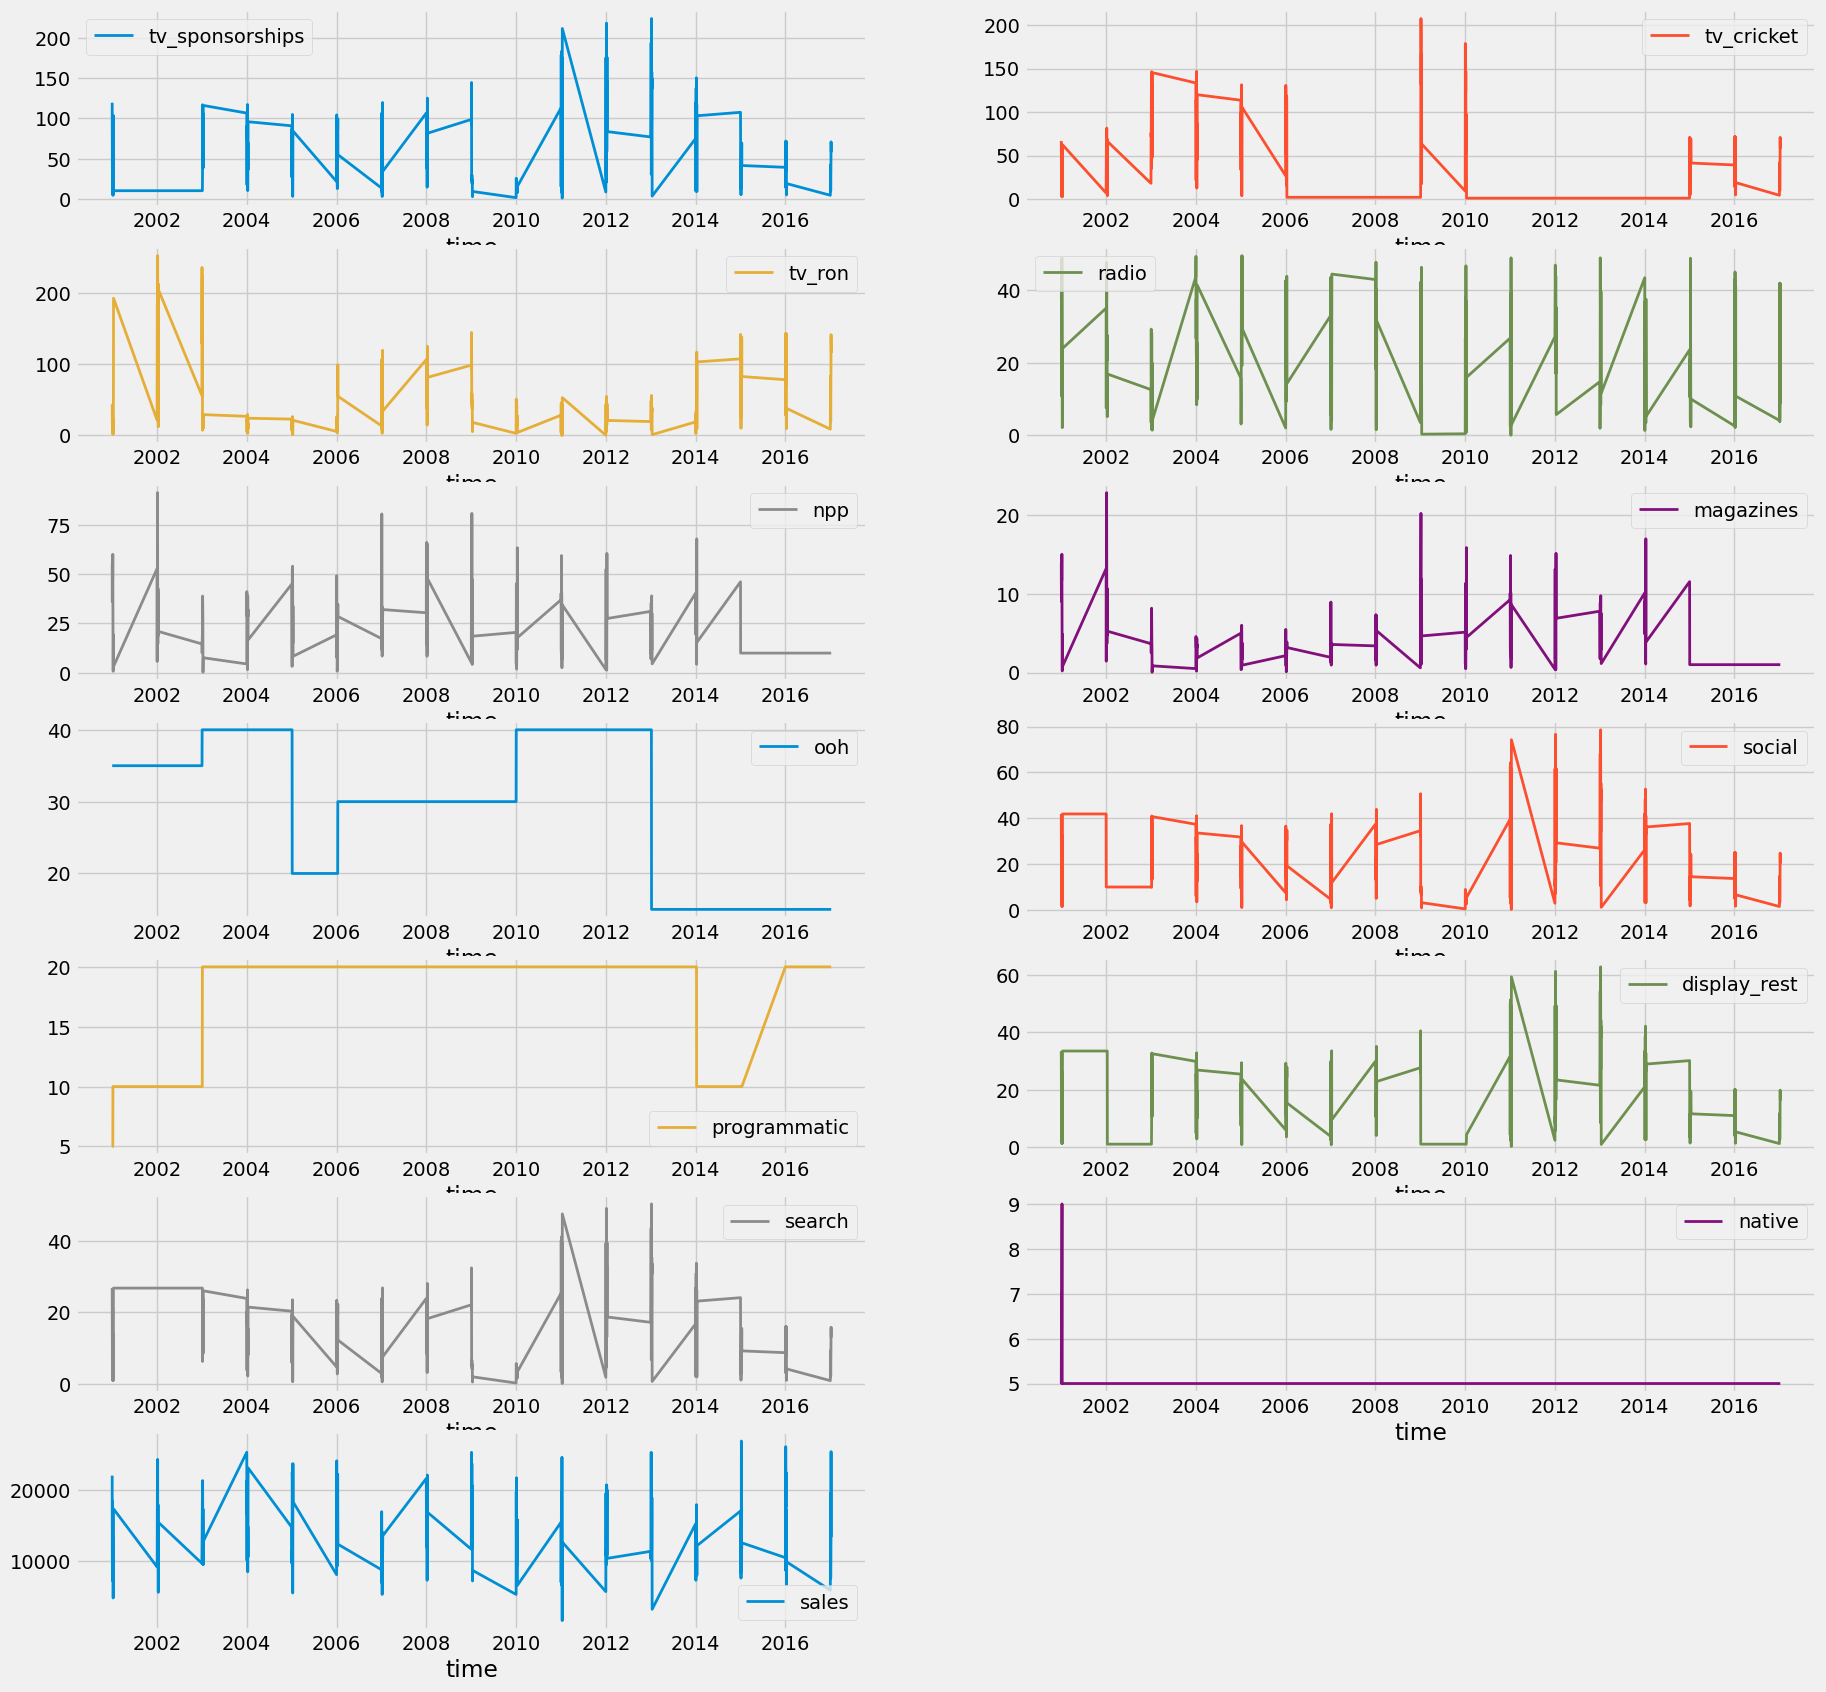

In [ ]:
plt.style.use('fivethirtyeight')

df2 = df.copy('Deep')
df2 = df2.set_index('time')

# Facet plots
df2.plot(subplots=True,
        linewidth=2,
        layout=(7, 2), # 4 rows, 1 column
        figsize=(20, 20), # width 20
        sharex=False,
        sharey=False)
plt.show()

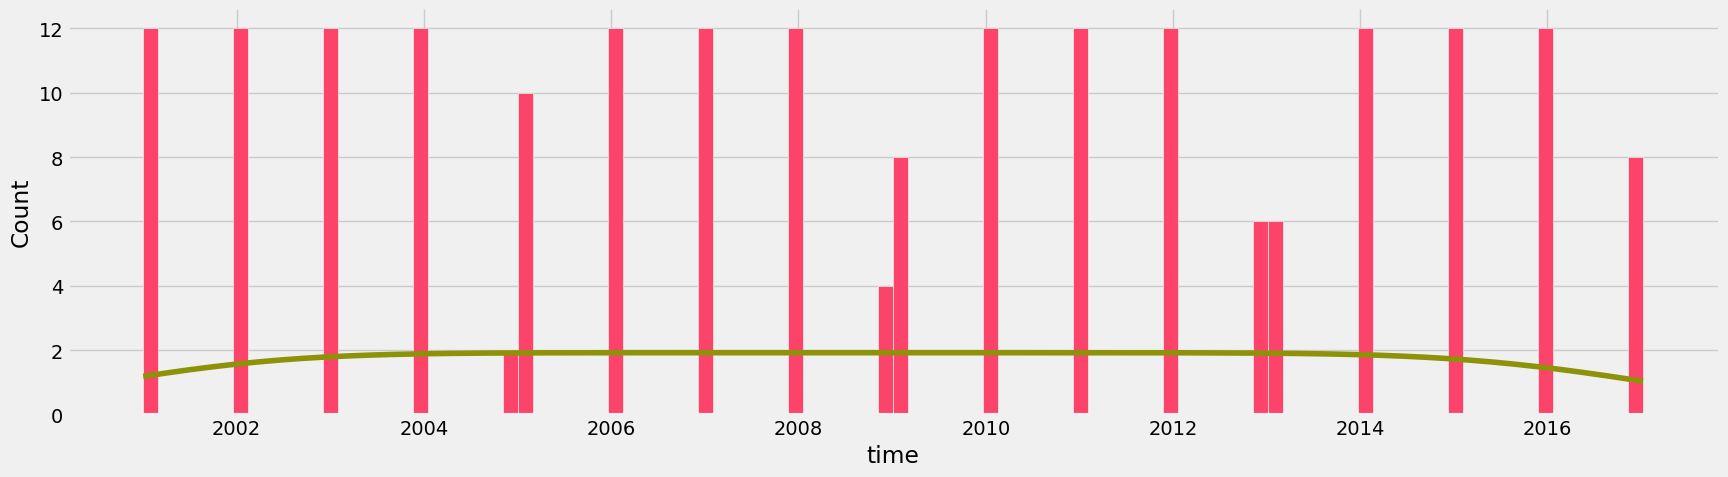

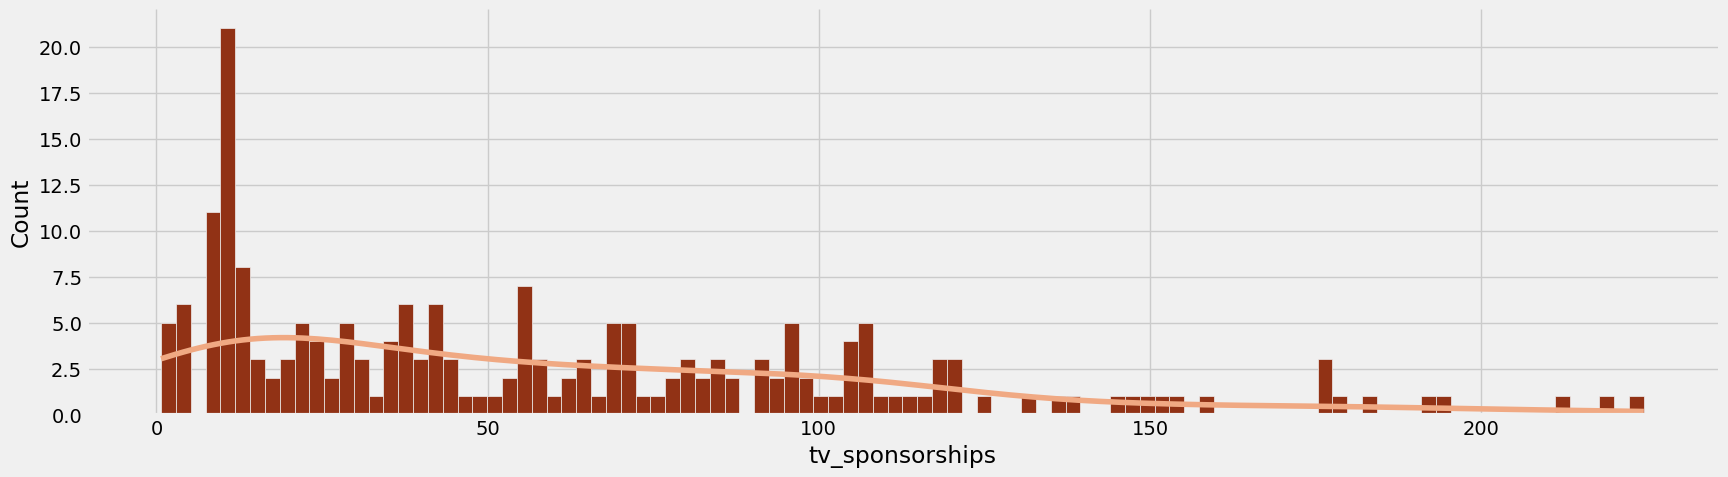

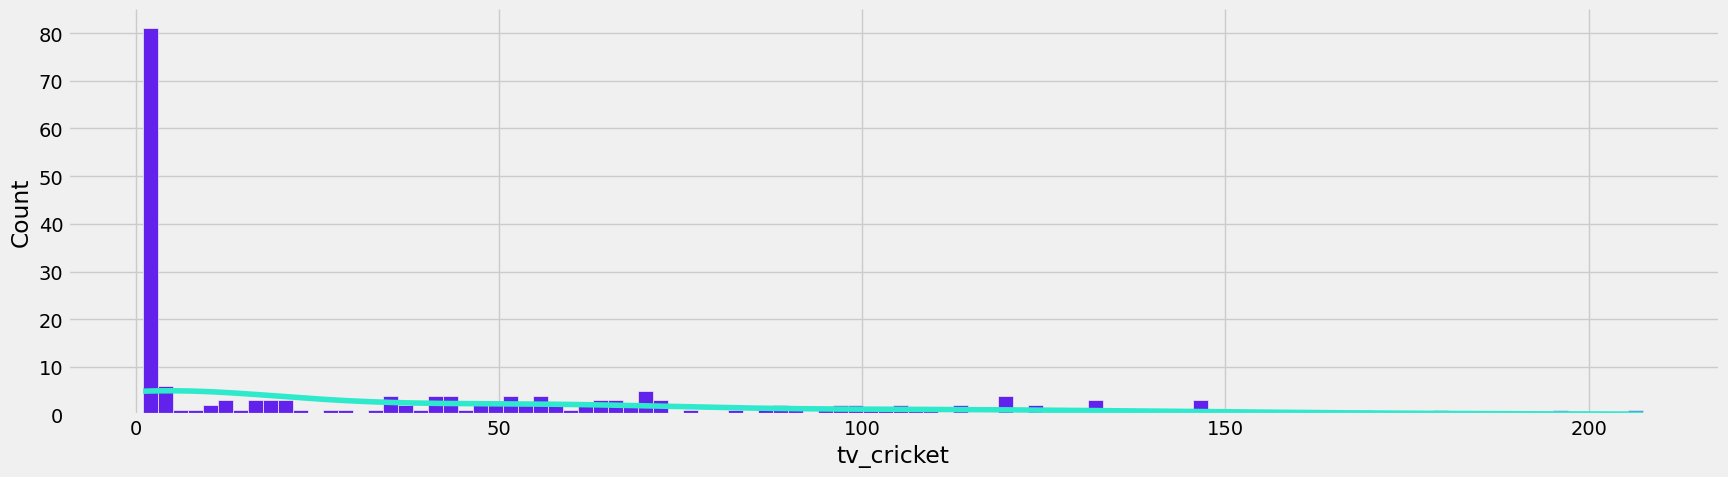

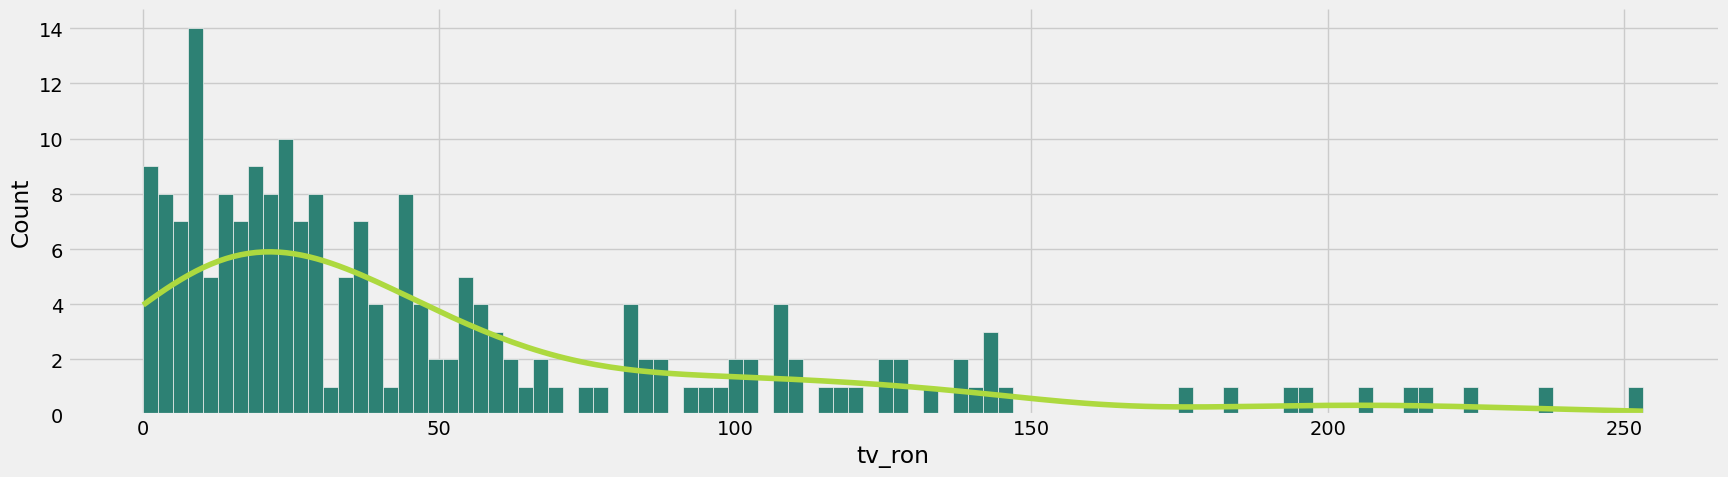

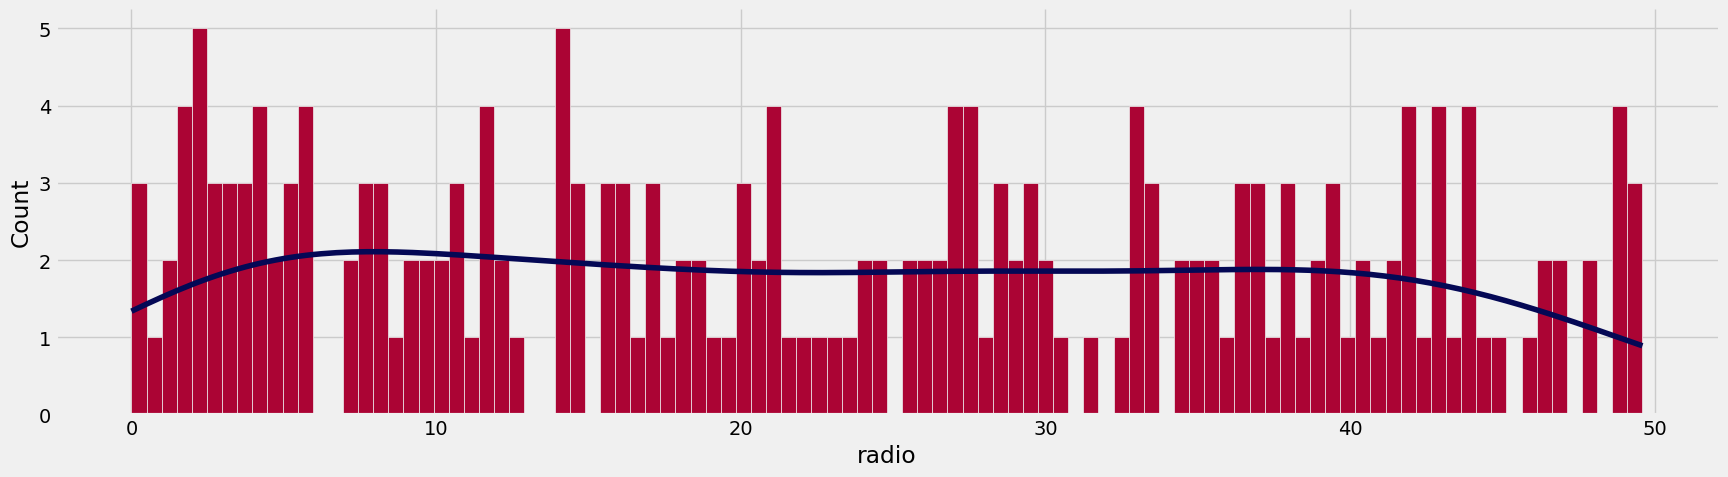

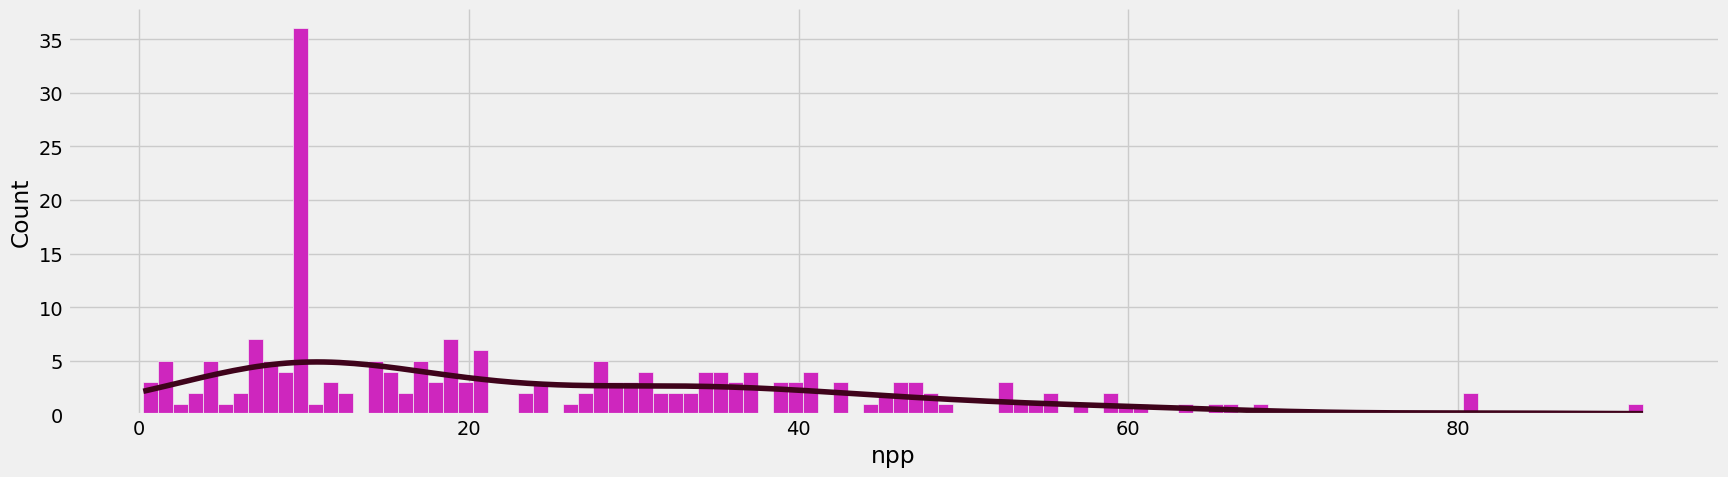

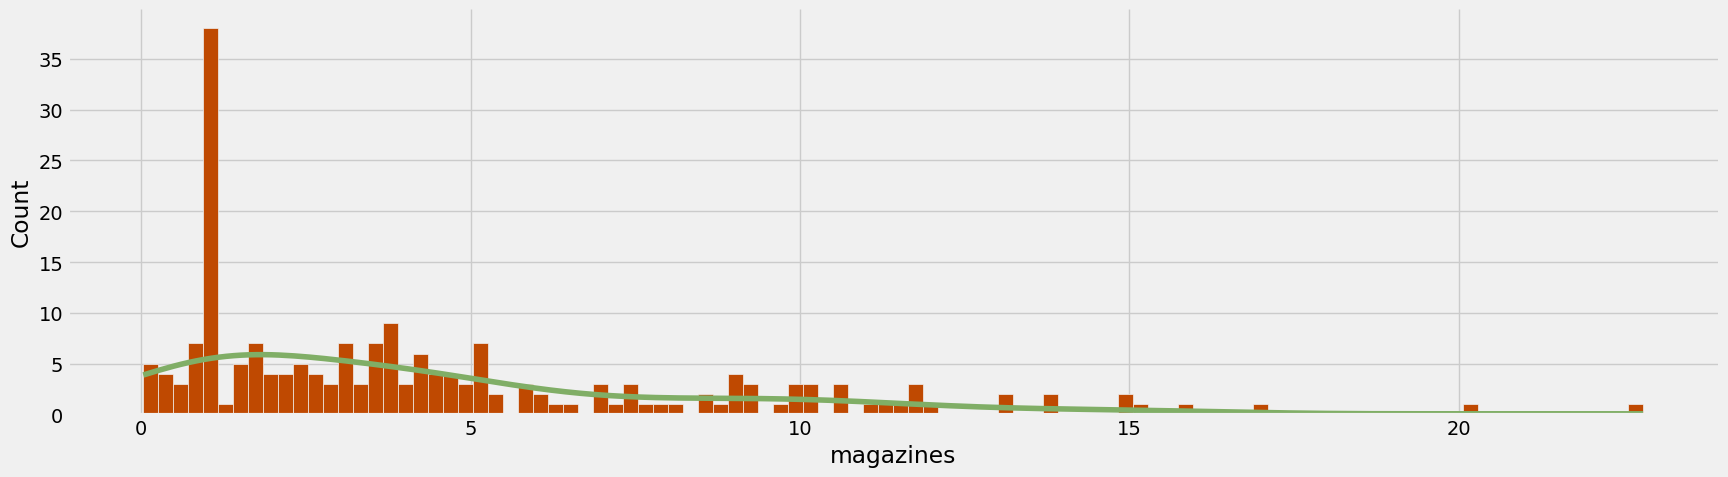

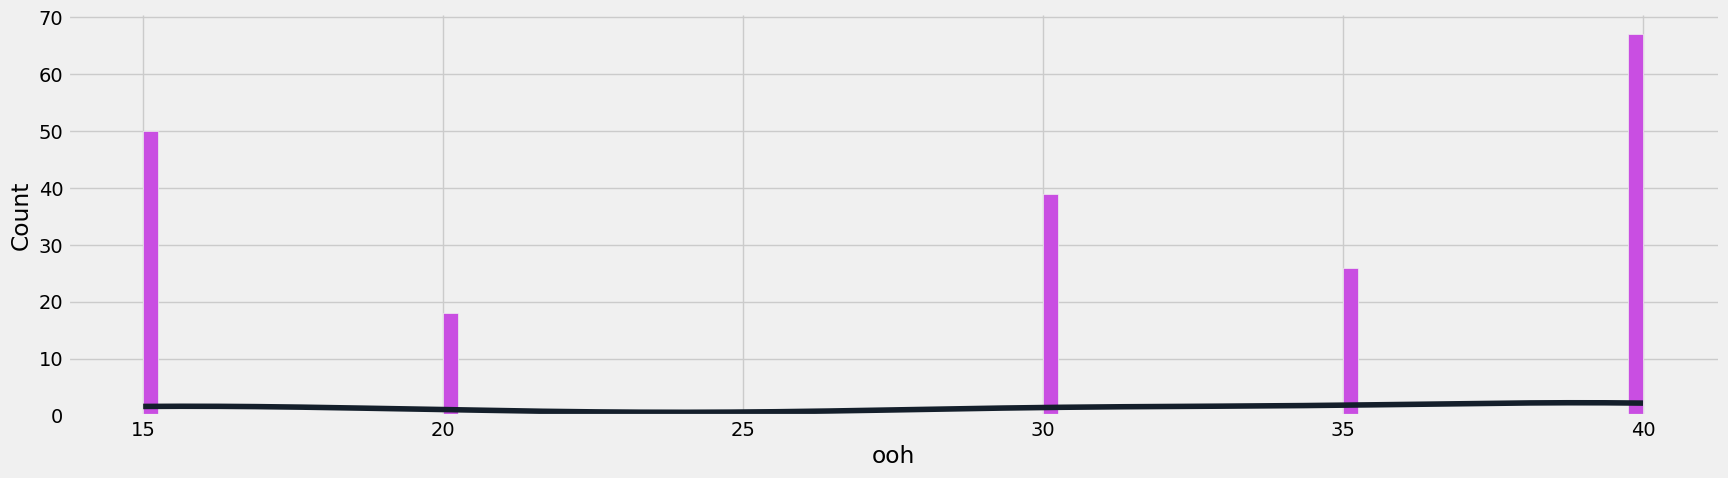

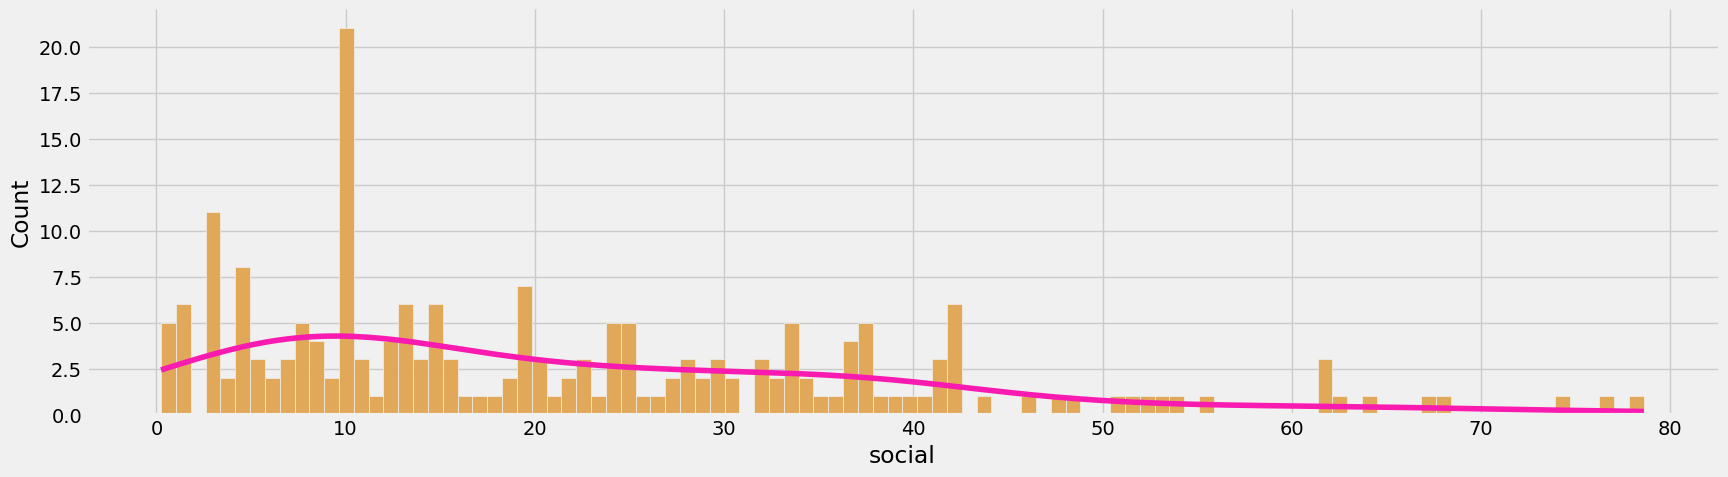

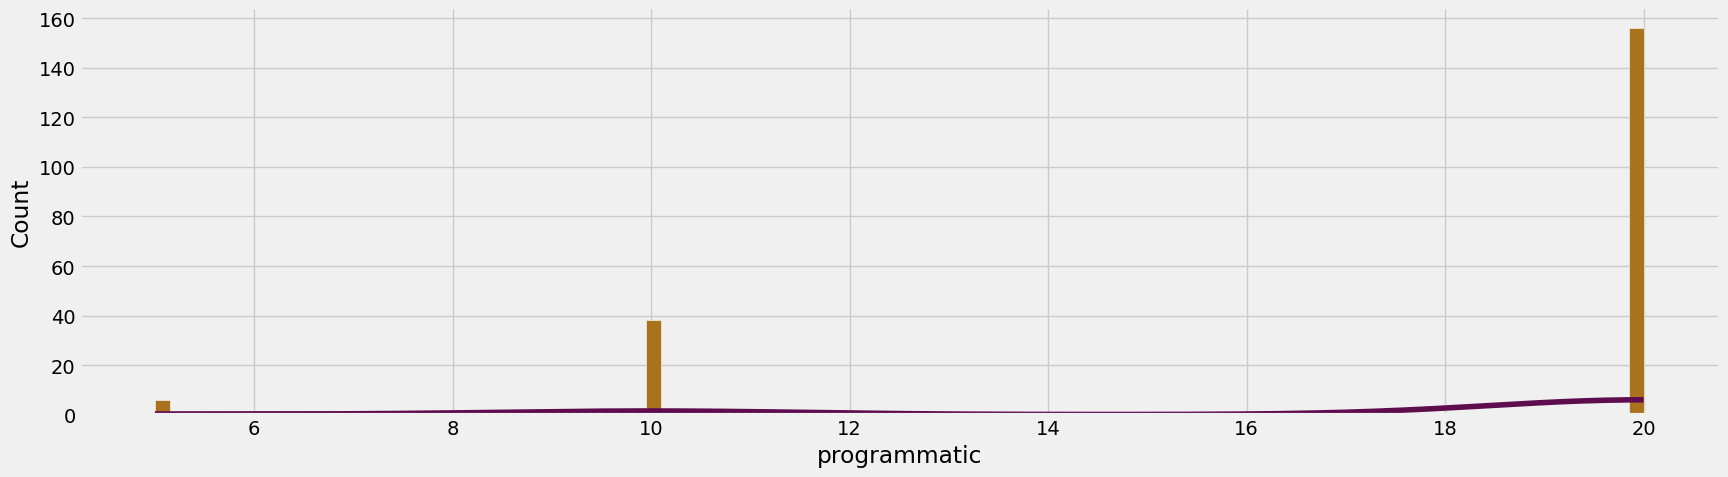

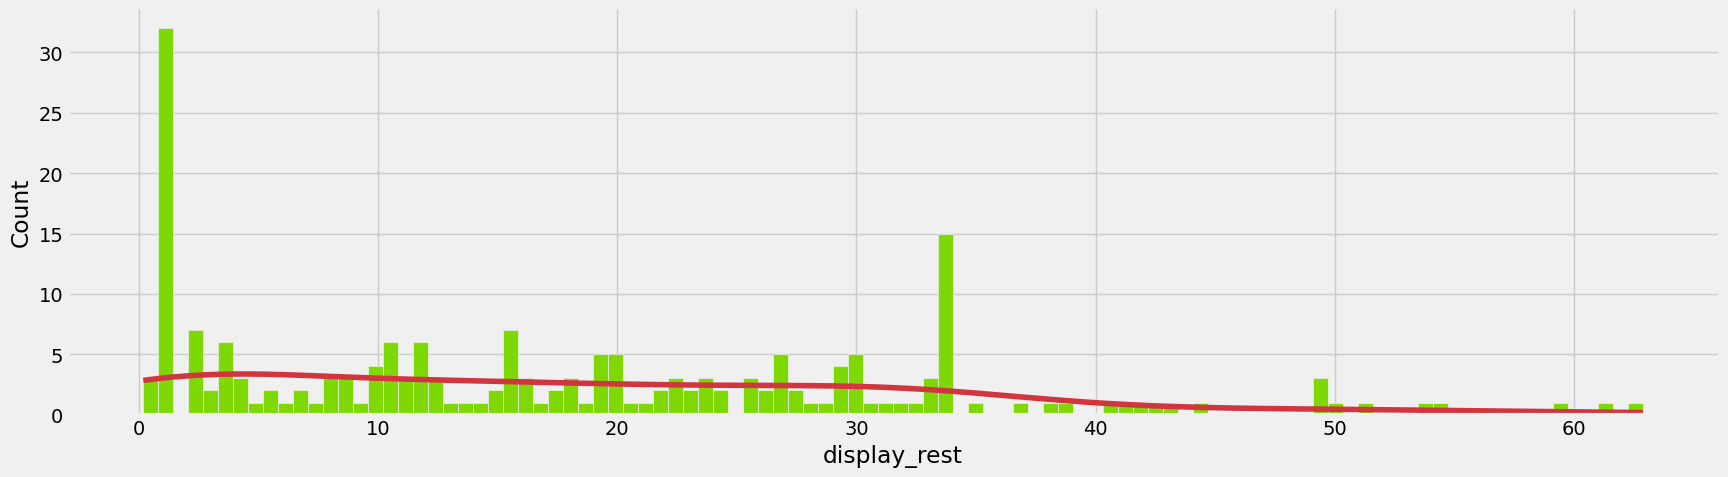

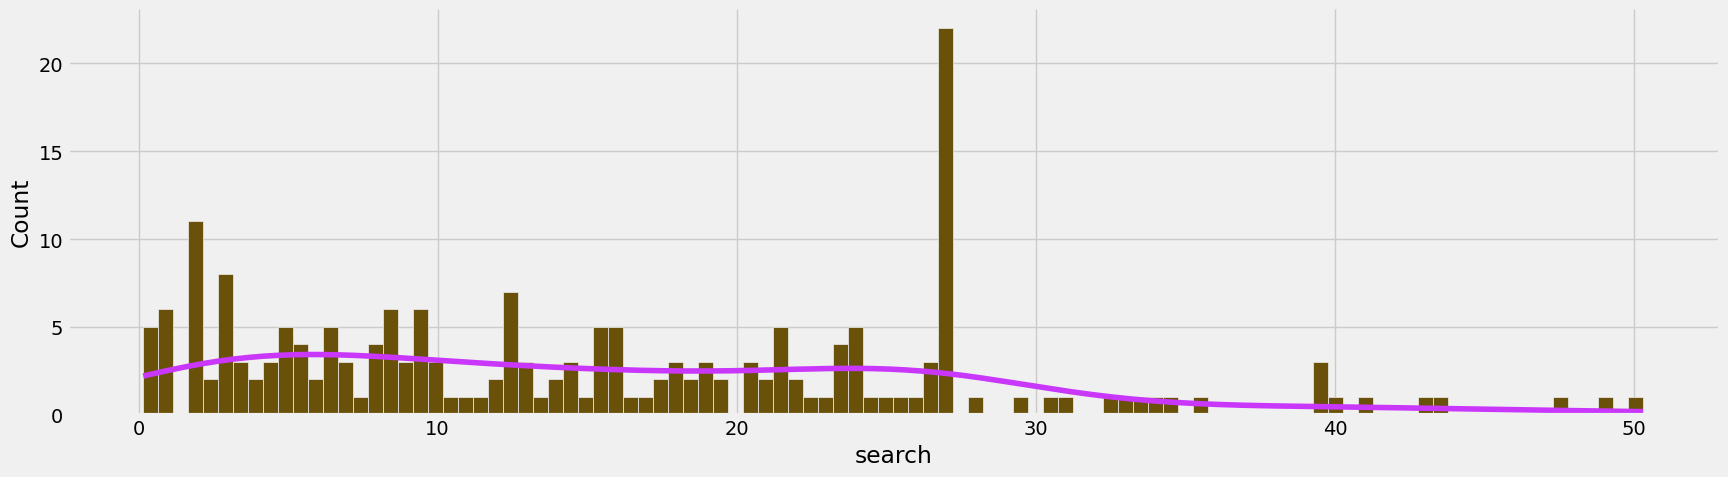

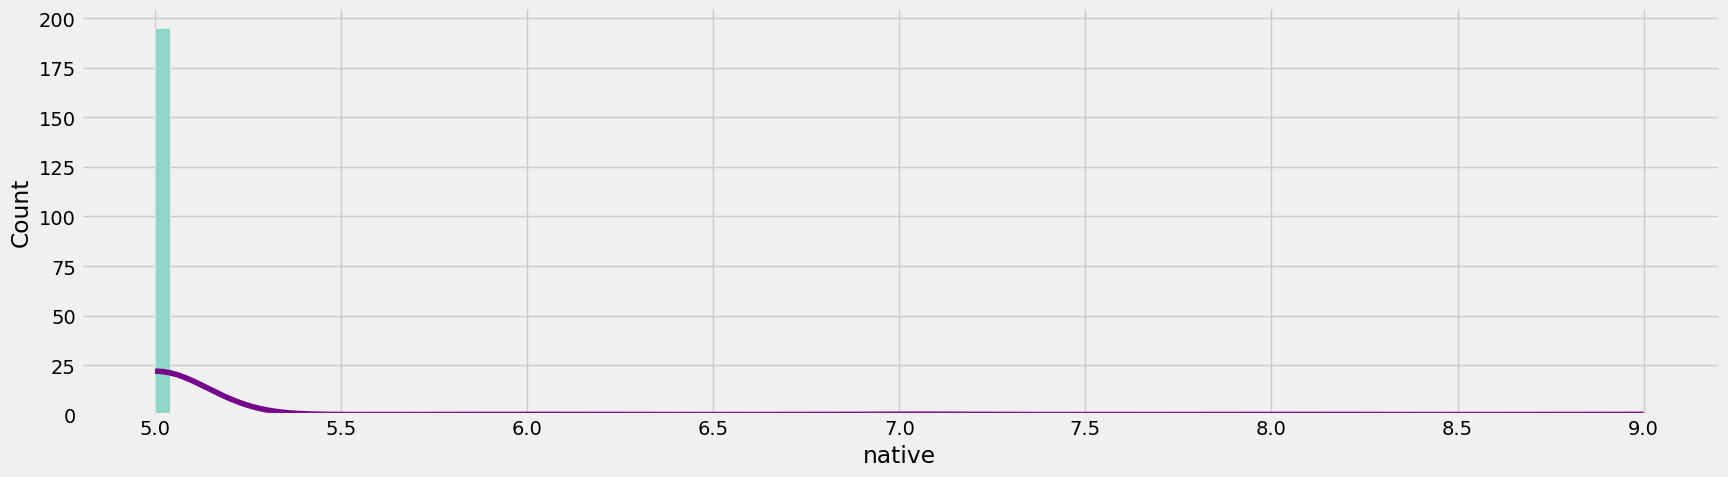

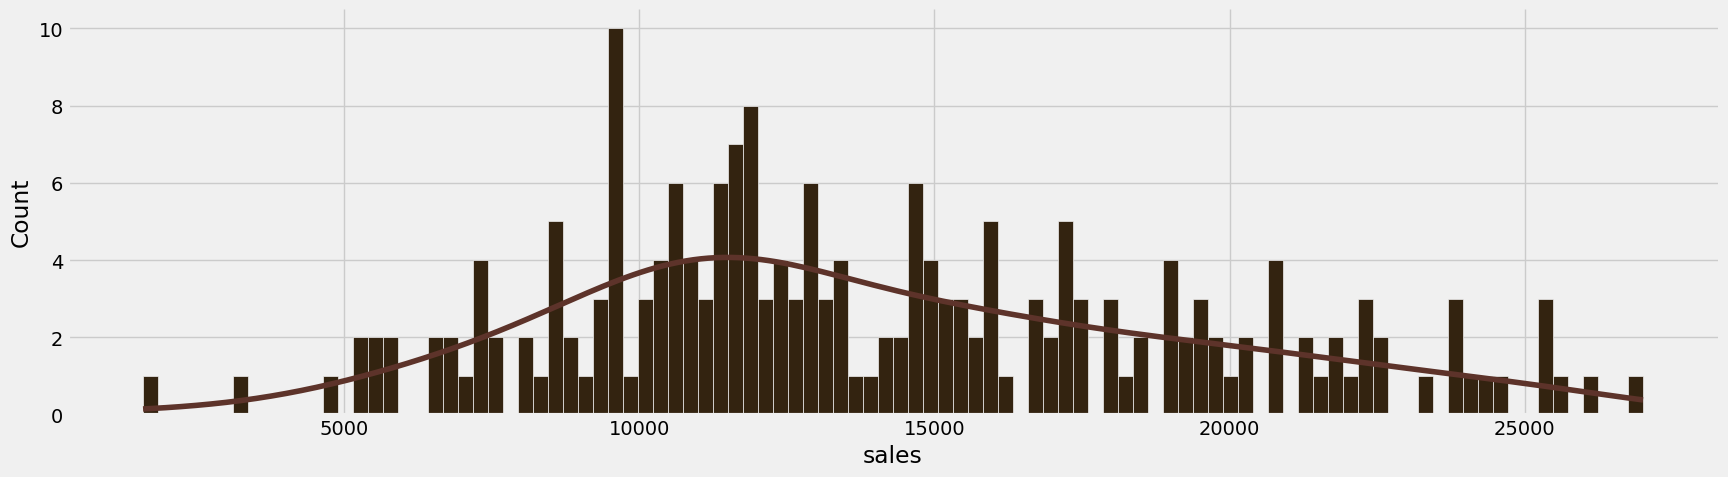

In [ ]:
def random_color():
  # Generate random hex color, excluding too light colors
  while True:
    color = '#{:06x}'.format(random.randint(0, 0xFFFFFF))
    # Convert hex to RGB to check brightness
    r = int(color[1:3], 16)
    g = int(color[3:5], 16)
    b = int(color[5:7], 16)
    # Skip if color is too light (using perceived brightness formula)
    if (0.299 * r + 0.587 * g + 0.114 * b) < 200:
      return color

for column_name in df.columns:
  ax1 = sns.displot(data=df,
          x=column_name,
          kde=True,
          bins=100,
          facecolor=random_color(),
          height=5,
          aspect=3.5,
          color=random_color())

# 4 FEATURE ENGINEERING



## 4.1 REMOVE OUTLIERS

In [ ]:
# Hàm loại bỏ ngoại lai dùng IQR
def remove_outliers_iqr(df):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns
    selected_columns = ['tv_sponsorships','tv_cricket' ,'tv_ron','radio','npp','magazines','ooh','social','programmatic','display_rest','search','native','sales']  # Danh sách cột cần lấy
    for col in numeric_cols.intersection(selected_columns):  # Chỉ lấy những cột vừa là số, vừa có trong danh sách chọn
    # for col in df.select_dtypes(include=['number']).columns:  # Chỉ áp dụng cho cột số
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

training_data = remove_outliers_iqr(df)
print(training_data.info())

# Input the dependent variable
dependent_var = 'sales'
y = training_data[dependent_var]

# Define the independent variables
independent_vars = training_data.columns.drop([dependent_var,'time']).tolist()
X = training_data[independent_vars]

# Define the confidence interval
confidence_interval = 0.95
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 29 to 199
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   time             144 non-null    datetime64[ns]
 1   tv_sponsorships  144 non-null    float64       
 2   tv_cricket       144 non-null    float64       
 3   tv_ron           144 non-null    float64       
 4   radio            144 non-null    float64       
 5   npp              144 non-null    float64       
 6   magazines        144 non-null    float64       
 7   ooh              144 non-null    int64         
 8   social           144 non-null    float64       
 9   programmatic     144 non-null    int64         
 10  display_rest     144 non-null    float64       
 11  search           144 non-null    float64       
 12  native           144 non-null    int64         
 13  sales            144 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(4)
mem

## 4.2 SCATTER PLOT FOR EACH INDEPENDENT VARIABLE

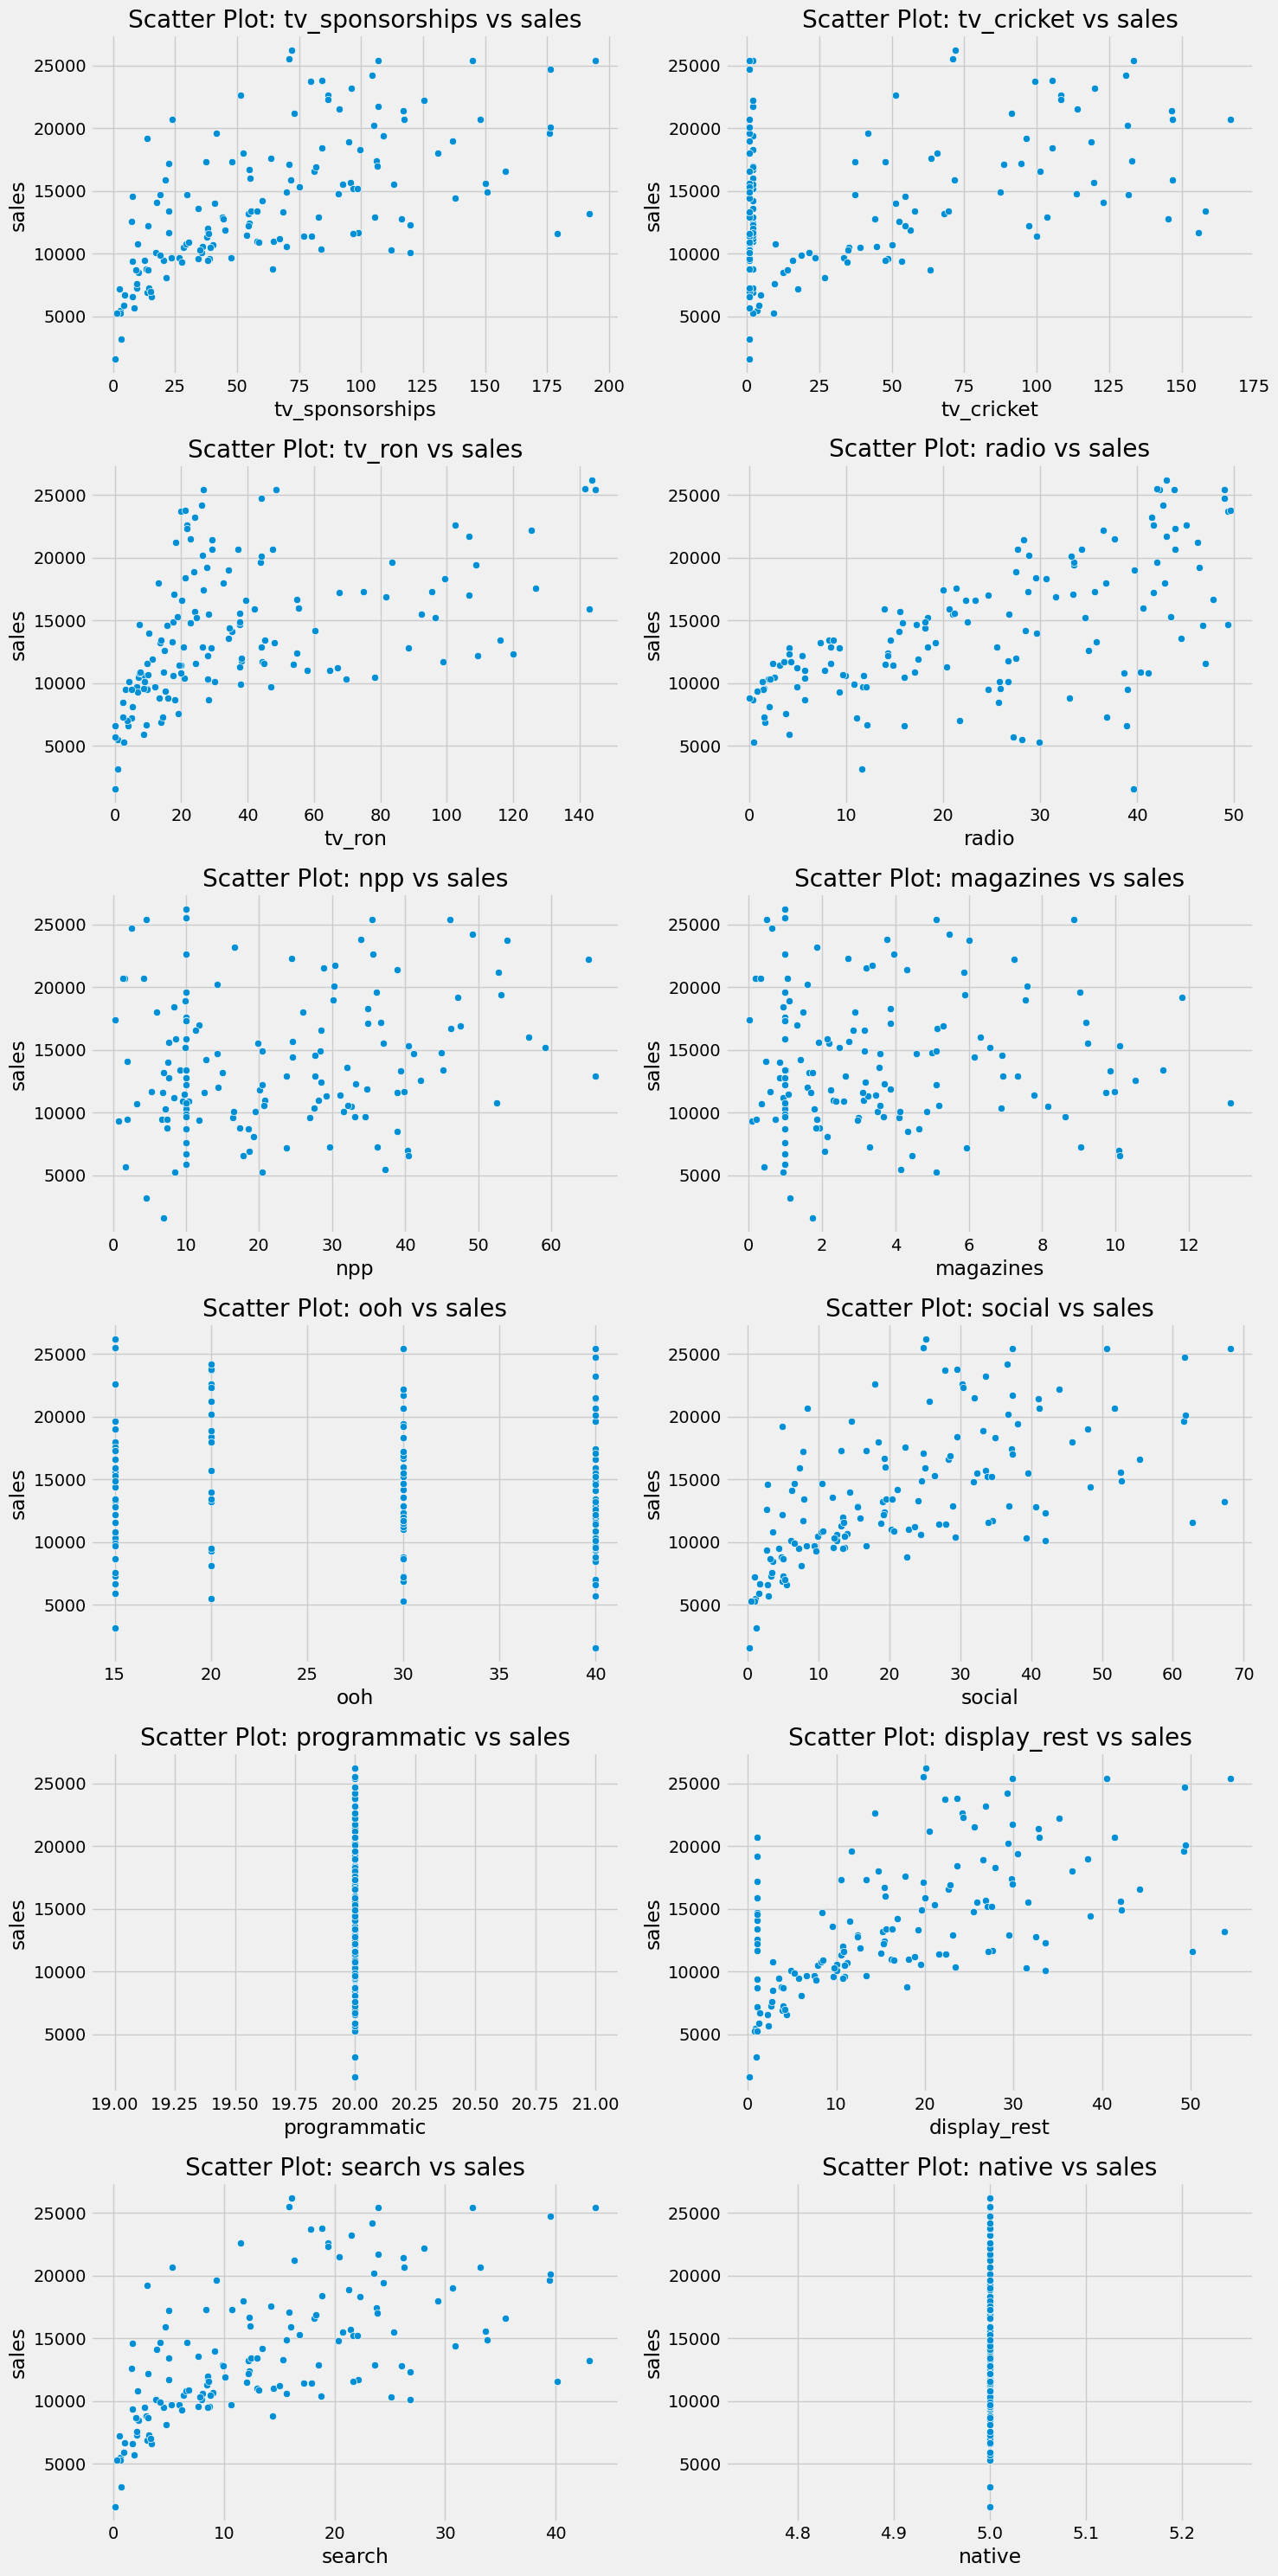

In [ ]:
# Biểu đồ phân tán cho từng biến độc lập
num_plots = len(independent_vars)
cols = 2  # Number of columns in the subplot grid
rows = (num_plots + cols - 1) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figsize as needed
axes = axes.ravel()  # Flatten the axes array for easier iteration


for i, col in enumerate(independent_vars):
    sns.scatterplot(x=col, y=dependent_var, data=training_data, ax=axes[i])
    axes[i].set_title(f'Scatter Plot: {col} vs {dependent_var}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(f'{dependent_var}')
    axes[i].grid(True)

# Hide any unused subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## 4.3. CORRELATION COEFFICIENT

<Axes: >

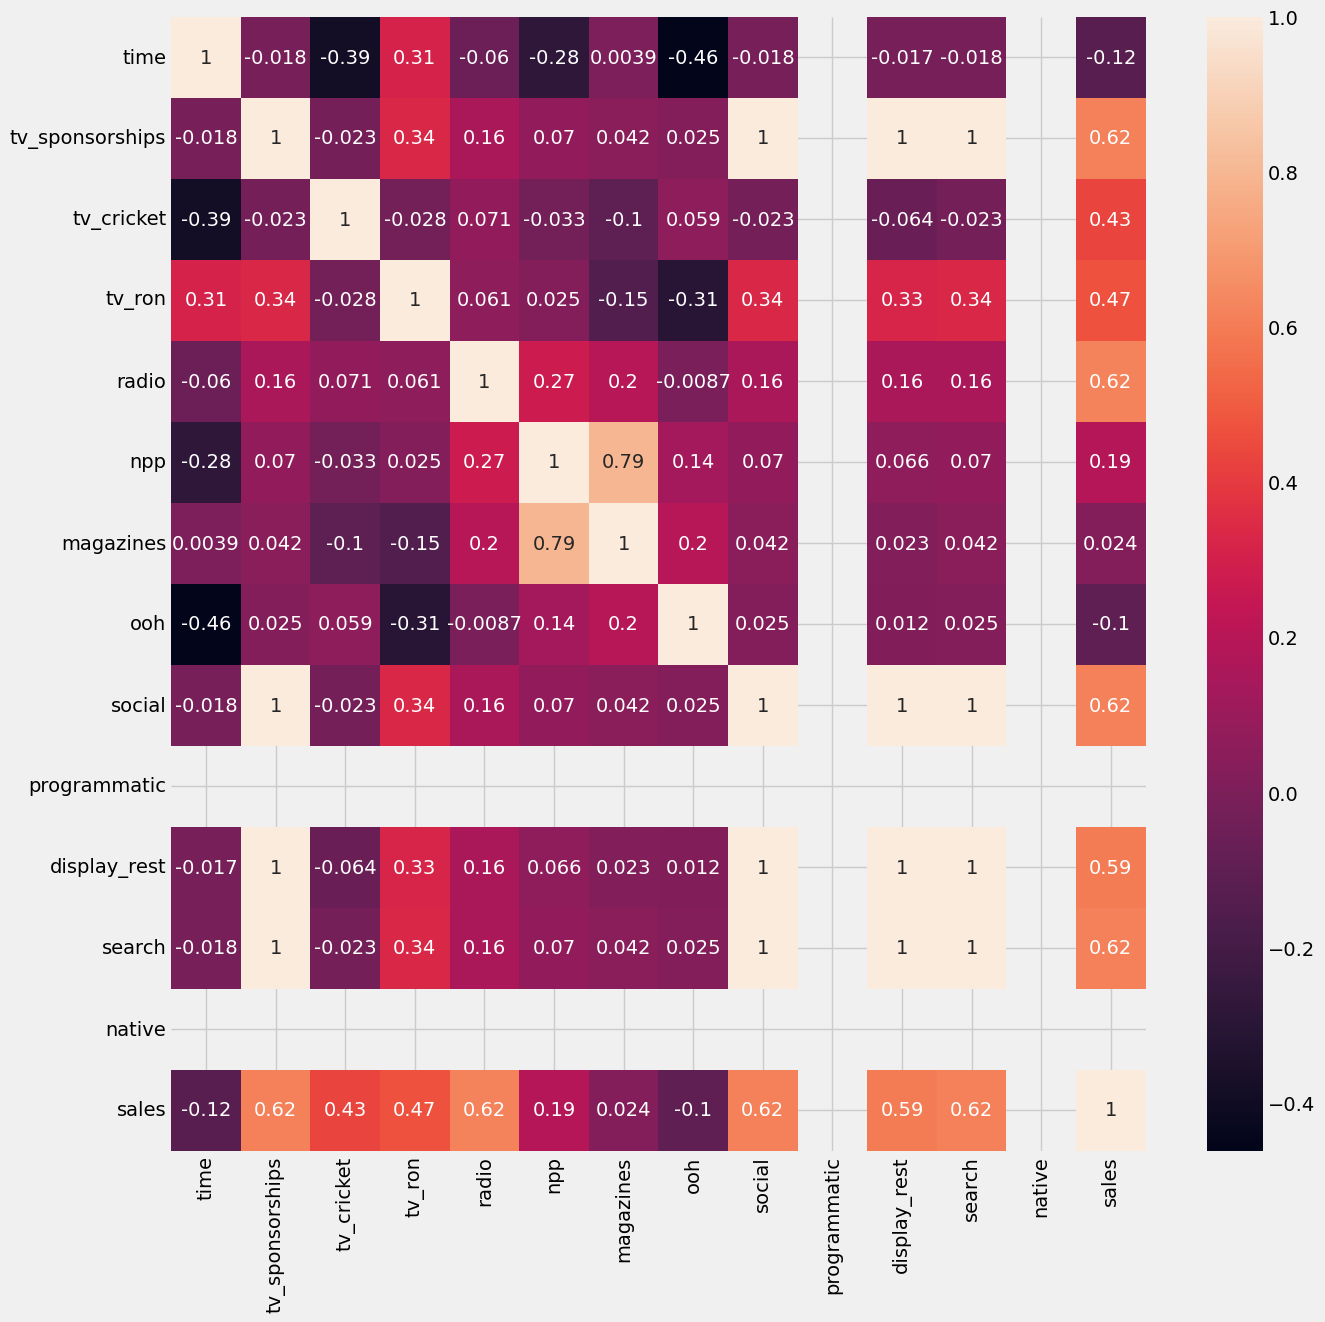

In [ ]:
# Calculate the correlation matrix
correlation_matrix = training_data.corr()

#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(14, 14))
sns.heatmap(training_data.corr(), fmt='.2g', annot=True)

## 4.4 STEPWISE SELECTION

In [ ]:
# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    if X.shape[1] > 1:  # Check if there are more than 1 columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    else:
        vif["VIF"] = [np.nan]  # Assign NaN if only one column is present
    return vif

# Function to perform stepwise regression
def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.05, verbose=True):
    initial_features = X.columns.tolist()
    best_features = []
    model_details = []  # List to store details of each regression model

    while True:
        changed = False

        # Forward step
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

            # Save model details
            model_details.append({
                'Features': best_features + [new_column],
                'AIC': model.aic,
                'BIC': model.bic,
                'R-squared': model.rsquared,
                'Adjusted R-squared': model.rsquared_adj
            })

        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_features.append(new_pval.idxmin())
            changed = True

        # Backward step
        model = sm.OLS(y, sm.add_constant(X[best_features])).fit()
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            best_features.remove(worst_feature)

        if not changed:
            break

    return best_features, model_details

# Perform stepwise regression
best_features, model_details = stepwise_selection(X, y)

# Print details of all regression models
print("All Models Details:")
for idx, details in enumerate(model_details, 1):
    print(f"Model {idx}:")
    print(f"Features: {details['Features']}")
    print(f"R-squared: {details['R-squared']:.4f}, Adjusted R-squared: {details['Adjusted R-squared']:.4f}") #AIC: {details['AIC']:.4f}, BIC: {details['BIC']:.4f},

    # Calculate VIF for the current model
    current_model_X = X[details['Features']]
    current_vif = calculate_vif(current_model_X)
    print(f"VIF for Model {idx}:")
    print(current_vif)
    print("-" * 40)
print()

# Filter for significant p-values and VIF < 10
filtered_models = []
for idx, details in enumerate(model_details):
    current_model_X = X[details["Features"]]
    current_vif = calculate_vif(current_model_X)

    # Check for VIF values less than 10 (excluding intercept if present)
    valid_vif = True
    if 'const' in current_vif['Variable'].values:
      current_vif = current_vif[current_vif['Variable'] != 'const']

    #Check if all VIF values are less than 10
    if len(current_vif) > 0 and current_vif['VIF'].max() >= 10:
        valid_vif = False

    if valid_vif:
        filtered_models.append(details)

# Find best model within filtered ones
best_model_filtered = None
best_r_squared = -1

for model in filtered_models:
    if model['R-squared'] > best_r_squared:
        best_r_squared = model['R-squared']
        best_model_filtered = model

print("Best Model after filtering by VIF < 10:")
if best_model_filtered:
    # print(best_model_filtered)
    #Fit the best model
    best_model = sm.OLS(y, sm.add_constant(X[best_model_filtered['Features']])).fit()
    print(best_model.summary())
    print()
    print("VIF for best model:")
    print(calculate_vif(X[best_model_filtered['Features']]))
else:
    print("No model found within VIF < 10")

All Models Details:
Model 1:
Features: ['programmatic']
R-squared: 0.0000, Adjusted R-squared: 0.0000
VIF for Model 1:
       Variable  VIF
0  programmatic  NaN
----------------------------------------
Model 2:
Features: ['radio']
R-squared: 0.3852, Adjusted R-squared: 0.3809
VIF for Model 2:
  Variable  VIF
0    radio  NaN
----------------------------------------
Model 3:
Features: ['native']
R-squared: 0.0000, Adjusted R-squared: 0.0000
VIF for Model 3:
  Variable  VIF
0   native  NaN
----------------------------------------
Model 4:
Features: ['npp']
R-squared: 0.0343, Adjusted R-squared: 0.0275
VIF for Model 4:
  Variable  VIF
0      npp  NaN
----------------------------------------
Model 5:
Features: ['search']
R-squared: 0.3788, Adjusted R-squared: 0.3744
VIF for Model 5:
  Variable  VIF
0   search  NaN
----------------------------------------
Model 6:
Features: ['magazines']
R-squared: 0.0006, Adjusted R-squared: -0.0065
VIF for Model 6:
    Variable  VIF
0  magazines  NaN
-----

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model

VIF for Model 40:
       Variable       VIF
0  programmatic  0.000000
1        native  0.000000
2         radio  1.005054
3    tv_cricket  1.005054
----------------------------------------
Model 41:
Features: ['programmatic', 'native', 'radio', 'tv_sponsorships']
R-squared: 0.6586, Adjusted R-squared: 0.6537
VIF for Model 41:
          Variable       VIF
0     programmatic  0.000000
1           native  0.000000
2            radio  1.026279
3  tv_sponsorships  1.026279
----------------------------------------
Model 42:
Features: ['programmatic', 'native', 'radio', 'tv_ron']
R-squared: 0.5740, Adjusted R-squared: 0.5680
VIF for Model 42:
       Variable       VIF
0  programmatic  0.000000
1        native  0.000000
2         radio  1.003736
3        tv_ron  1.003736
----------------------------------------
Model 43:
Features: ['programmatic', 'native', 'radio', 'search', 'npp']
R-squared: 0.6586, Adjusted R-squared: 0.6513
VIF for Model 43:
       Variable       VIF
0  programmatic  0.000

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: Runtim

VIF for Model 70:
          Variable       VIF
0     programmatic  0.000000
1           native  0.000000
2            radio  1.079601
3           search       inf
4       tv_cricket  1.023119
5           social       inf
6  tv_sponsorships       inf
7           tv_ron  1.166883
8        magazines  1.092785
----------------------------------------
Model 71:
Features: ['programmatic', 'native', 'radio', 'search', 'tv_cricket', 'social', 'tv_sponsorships', 'tv_ron', 'ooh']
R-squared: 0.9082, Adjusted R-squared: 0.9049
VIF for Model 71:
          Variable       VIF
0     programmatic  0.000000
1           native  0.000000
2            radio  1.032502
3           search       inf
4       tv_cricket  1.009995
5           social       inf
6  tv_sponsorships       inf
7           tv_ron  1.269713
8              ooh  1.130328
----------------------------------------
Model 72:
Features: ['programmatic', 'native', 'radio', 'search', 'tv_cricket', 'social', 'tv_sponsorships', 'tv_ron', 'npp']
R-sq

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782

Best Model after filtering by VIF < 10:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     336.7
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.99e-70
Time:                        08:39:52   Log-Likelihood:                -1268.0
No. Observations:                 144   AIC:                             2546.
Df Residuals:                     139   BIC:                             2561.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
programm

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influenc

## 4.5 FEATURE ENGINEERING

In [ ]:
independent_vars = best_model_filtered['Features']
dependent_var = y.name
print(dependent_var)
data_model = training_data[[dependent_var] + independent_vars] # Use combined_df
print(data_model.head())

sales
    sales  programmatic  native  radio    search  tv_cricket  tv_ron
29  10500            20       5   16.0   6.32576       35.30    7.06
30  21400            20       5   28.3  26.24384      146.45   29.29
31  11900            20       5   17.4  10.11584       56.45   11.29
32   9600            20       5    1.5   8.70912       48.60    9.72
33  17400            20       5   20.0  23.79776      132.80   26.56


# 5 MULTIPLY LINEAR REGRESSION

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     336.7
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           1.99e-70
Time:                        08:58:19   Log-Likelihood:                -1268.0
No. Observations:                 144   AIC:                             2546.
Df Residuals:                     139   BIC:                             2561.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.3602      0.766      9.614   

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
<ipython-input-57-50ac012d6001>:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['predicted_values'] = predicted_values # Adding the column to 'table'


Đánh giá MSE và RMSE:
Mean Squared Error (MSE): mse = 2606359.5294656623. The model's Mean Squared Error (MSE) is high, indicating poor fit. Consider model improvement.
Root Mean Squared Error (RMSE): mse = 1614.4223516371615. The model's Root Mean Squared Error is high, suggesting inaccurate predictions. Consider model improvement.

Đánh giá tổng hợp:
Should Optimized Model

Regression Equation:
y = 7.36 + 147.204 * programmatic + 36.801 * native + 176.539 * radio + 222.327 * search + 45.287 * tv_cricket + 45.316 * tv_ron



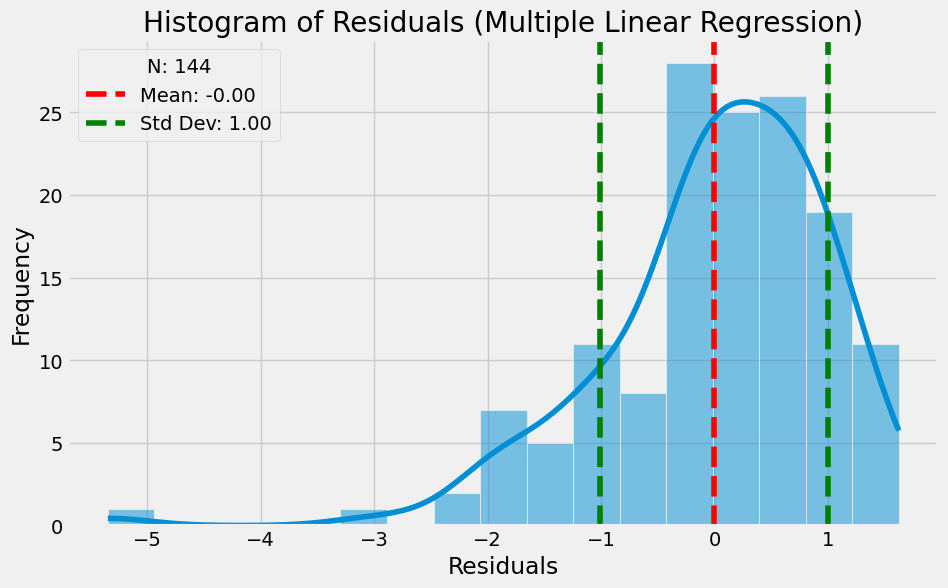

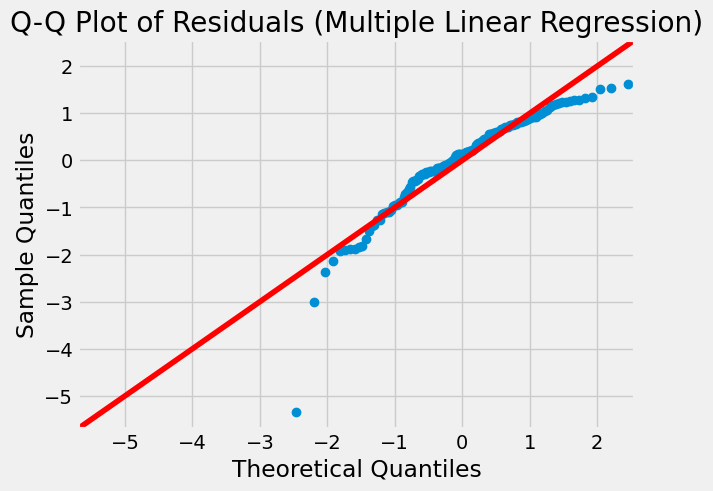

In [ ]:
# Tạo mô hình hồi quy tuyến tính bội sử dụng công thức
# Create the formula for the regression model
formula = f"{dependent_var} ~ {' + '.join(independent_vars)}"
# Create the multiple linear regression model using the formula
model_multiple = smf.ols(formula, data=data_model).fit()
print(model_multiple.summary())
print()

# Kiểm định Durbin-Watson
residuals_multiple = model_multiple.resid
durbin_watson_multiple = sm.stats.stattools.durbin_watson(residuals_multiple)

# Redesign the model_summary table
model_summary_multiple = pd.DataFrame({
  'Date': [model_multiple.summary2().tables[0].iloc[2, 1]],
  'Model': ['OLS'],
  'Dependent Variable': [model_multiple.summary2().tables[0].iloc[1, 1]],
  'R-squared': [model_multiple.rsquared],
  'Adj. R-squared': [model_multiple.rsquared_adj],
  'Durbin Watson': [durbin_watson_multiple]
})
print('Model Summary:')
print(model_summary_multiple.to_string(index=False))
print()

# Bảng ANOVA
anova_table_multiple = sm.stats.anova_lm(model_multiple, typ=2, robust='hc3')
# Calculate total sum of squares
total_sum_squares = sum((data_model[dependent_var] - data_model[dependent_var].mean())**2)
# Calculate regression sum of squares
regression_sum_squares = total_sum_squares - anova_table_multiple['sum_sq']['Residual']
# Degrees of freedom
df_regression = model_multiple.summary().tables[0][6][1].data
df_residual = model_multiple.summary().tables[0][7][1].data
df_total = pd.to_numeric(df_regression, errors='coerce') + pd.to_numeric(df_residual, errors='coerce')
# F-statistic and p-value
f_statistic = pd.to_numeric(model_multiple.summary().tables[0][2][3].data, errors='coerce')
p_value = pd.to_numeric(model_multiple.summary().tables[0][3][3].data, errors='coerce')
# Create the ANOVA table
anova_table_multiple = pd.DataFrame({
  'Source': ['Regression', 'Residual', 'Total'],
  'sum_sq': [regression_sum_squares, anova_table_multiple['sum_sq']['Residual'], total_sum_squares],
  'df': [df_regression, df_residual, df_total],
  'F': [f_statistic, None, None],
  'PR(>F)': [p_value, None, None]
})
print('ANOVA Table:')
print(anova_table_multiple.to_string(index=False))
print()

# Bảng Coefficients
coefficients_multiple = model_multiple.summary2().tables[1]
# Calculate the standardized coefficients (beta)
standardized_coefficients = model_multiple.params * (data_model[independent_vars].std() / data_model[dependent_var].std())
# Add the standardized coefficients to the coefficients table
coefficients_multiple['Standardized Coef.'] = standardized_coefficients
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = independent_vars
vif_data["VIF"] = [variance_inflation_factor(data_model[independent_vars].values, i) for i in range(len(independent_vars))]
# Add the VIP column to the coefficients_multiple dataframe
coefficients_multiple = coefficients_multiple.merge(vif_data, how='left', left_index=True, right_on='Variable')
# Rearrange the columns
coefficients_multiple = coefficients_multiple[['Variable', 'Coef.', 'Std.Err.', 'Standardized Coef.', 't', 'P>|t|', '[0.025', '0.975]', 'VIF']]
print('Coefficients:')
print(coefficients_multiple.to_string(index=False))
print()

# Đánh giá Adj. R-squared
adj_r_squared = model_multiple.rsquared_adj
adj_r_squared_result = 'Model fits well' if adj_r_squared > 0.7 else 'Model fits moderate' if 0.5 < adj_r_squared <= 0.7 else 'Model does not fit'
print('Đánh giá Adj. R-squared:')
print(adj_r_squared_result)
print()

# Kiểm định F - Kiểm tra Sig (p-value) bảng ANOVA
anova_p_value = anova_table_multiple.loc[0, 'PR(>F)']
anova_result = 'Model is significant' if anova_p_value < alpha else 'Model is not significant'
print('F Test- Kiểm tra Sig (p-value) bảng ANOVA:')
print(anova_result)
print()

# Kiểm định Durbin–Watson
durbin_watson_result = 'No autocorrelation' if 1.5 < durbin_watson_multiple < 2.5 else 'Autocorrelation present'
print('Durbin–Watson Test:')
print(durbin_watson_result)
print()

# Kiểm định t (student) - Kiểm tra Sig (p-value) từng biến độc lập bảng Coefficients
coefficients_p_values = coefficients_multiple['P>|t|']
# Check the significance of each independent variable excluding 'Intercept'
significant_vars = coefficients_multiple[(coefficients_multiple['P>|t|'] < alpha) & (coefficients_multiple['Variable'] != 'Intercept')]
non_significant_vars = coefficients_multiple[(coefficients_multiple['P>|t|'] >= alpha) & (coefficients_multiple['Variable'] != 'Intercept')]
if significant_vars is None and non_significant_vars is not None:
  result_t_test = f"Non-significant variables: {', '.join(non_significant_vars['Variable'].dropna())}"
elif significant_vars is not None and non_significant_vars is None:
  result_t_test = f"Significant variables: {', '.join(significant_vars['Variable'].dropna())}"
else:
  result_t_test = f"Significant variables: {', '.join(significant_vars['Variable'].dropna())} AND Non-significant variables: {', '.join(non_significant_vars['Variable'].dropna())}"
print('T (student) Test:')
print(result_t_test)
print()

# Check for multicollinearity using VIF
multicollinearity_vars = vif_data[vif_data['VIF'] > 10]
if not multicollinearity_vars.empty:
  multicollinearity_result = "There is a possibility of multicollinearity"
else:
  multicollinearity_result = "The model is suitable as all variables meet the VIF criteria"
print('Đánh giá hiện tượng đa cộng tuyến')
print(multicollinearity_result)
print()

# Predict the values using the regression model
predicted_values = model_multiple.predict(data_model) # Prediction using model_multiple
# Add the predicted values to the dataframe
data_model['predicted_values'] = predicted_values # Adding the column to 'table'
# Calculate MSE using NumPy
mse = np.mean((data_model[dependent_var] - data_model['predicted_values'])**2)
# Calculate RMSE
rmse = np.sqrt(mse)
# Evaluate MSE and RMSE
if mse < 10 : # example threshold, adjust as needed
  mse = f'mse = {mse}. The model\'s Mean Squared Error (MSE) is relatively low, suggesting good fit.'
else:
  mse = f'mse = {mse}. The model\'s Mean Squared Error (MSE) is high, indicating poor fit. Consider model improvement.'
if rmse < 3: # example threshold, adjust as needed
  rmse = f'mse = {rmse}. The model\'s Root Mean Squared Error is relatively low, suggesting accurate predictions.'
else:
  rmse = f'mse = {rmse}. The model\'s Root Mean Squared Error is high, suggesting inaccurate predictions. Consider model improvement.'
print('Đánh giá MSE và RMSE:')
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print()

# Kiểm tra nếu có điểm nào không đạt yêu cầu
if adj_r_squared_result != 'Model fits well' or anova_result != 'Model is significant' or durbin_watson_result != 'No autocorrelation' or multicollinearity_result != 'The model is suitable as all variables meet the VIF criteria' or 'Non-significant variables' in result_t_test:
  conclusion = "Should Optimized Model"
else:
  conclusion = "Model Meets Requirements"
print('Đánh giá tổng hợp:')
print(conclusion)
print()

# Tạo bảng hypothesis_test
hypothesis_test = pd.DataFrame({
  'Đánh giá Adj. R-squared': [f'Adjusted R-squared: {adj_r_squared:.3f}, Result: {adj_r_squared_result}'],
  'F Test': [f'ANOVA p-value: {anova_p_value:.3e}, Result: {anova_result}'],
  'T (student) Test': [result_t_test],
  'Durbin-Watson Test': [f'Durbin-Watson: {durbin_watson_multiple:.3f}, Result: {durbin_watson_result}'],
  'VIP Test': [multicollinearity_result],
  'mse': [mse],
  'rmse': [rmse],
  'Conclusion': [conclusion]
})
hypothesis_test = hypothesis_test.melt(var_name='Test', value_name='Result')

# Viết phương trình hồi quy
intercept = coefficients_multiple.loc[coefficients_multiple['Variable'] == 'Intercept', 'Coef.'].values[0]
slopes = coefficients_multiple.loc[coefficients_multiple['Variable'] != 'Intercept', ['Variable', 'Coef.']]
regression_equation = f'y = {intercept:.2f}'
for index, row in slopes.iterrows():
  regression_equation += f' + {row["Coef."]:.2f} * {row["Variable"]}'
  regression_equation = f'y = {intercept:.2f}'
  for index, row in slopes.iterrows():
    coef = row["Coef."]
    variable = row["Variable"]
    sign = '+' if coef >= 0 else '-'
    regression_equation += f' {sign} {abs(coef):.3f} * {variable}'
print('Regression Equation:')
print(regression_equation)
print()

# Tạo bảng phương trình hồi quy
regression_equation_df = pd.DataFrame({
  'Function': [regression_equation],
  'Conclusion': [conclusion]
})

# Biểu đồ Histogram để khảo sát phân phối của phần dư
standardized_residuals_multiple = model_multiple.get_influence().resid_studentized_internal
mean_residuals_multiple = standardized_residuals_multiple.mean()
std_dev_residuals_multiple = standardized_residuals_multiple.std()
N_residuals_multiple = len(standardized_residuals_multiple)
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals_multiple, kde=True)
plt.title('Histogram of Residuals (Multiple Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(mean_residuals_multiple, color='r', linestyle='--', label=f'Mean: {mean_residuals_multiple:.2f}')
plt.axvline(mean_residuals_multiple + std_dev_residuals_multiple, color='g', linestyle='--', label=f'Std Dev: {std_dev_residuals_multiple:.2f}')
plt.axvline(mean_residuals_multiple - std_dev_residuals_multiple, color='g', linestyle='--')
plt.legend(title=f'N: {N_residuals_multiple}')
plt.show()
print()

# Biểu đồ Q-Q plot để khảo sát phân phối của phần dư
sm.qqplot(standardized_residuals_multiple, line='45')
plt.title('Q-Q Plot of Residuals (Multiple Linear Regression)')
plt.show()

# 6 PREDICTION

In [ ]:
# Predict the values using the regression model
predicted_values = model_multiple.predict(data_model)

# Add the predicted values to the dataframe
data_model['predicted_values'] = predicted_values

# Get the column names of independent variables from the model
independent_vars = list(model_multiple.params.index)
independent_vars.remove('Intercept')

# Construct the column list for display, dynamically adding independent variable names
columns_to_display = independent_vars + ['predicted_values']
data_model[columns_to_display]
print(data_model)

# Example prediction for new data
# Define the value of independent variables for which you want to predict the dependent variable
new_data = pd.DataFrame({'search': [200],
                         'programmatic': [25],
                         'radio': [10],
                         'tv_cricket': [5],
                         'tv_ron': [5],
                         'native': [5]
                         })

# Predict the dependent variable value using the regression model
predicted_sales = model_multiple.predict(new_data)
# Display the predicted value
print(f'Predicted {dependent_var} for {independent_vars}: {predicted_sales.iloc[0]}')

     sales  programmatic  native  radio    search  tv_cricket  tv_ron  predicted_values
29   10500            20       5   16.0   6.32576      35.300    7.06       9285.013387
30   21400            20       5   28.3  26.24384     146.450   29.29      21925.767306
31   11900            20       5   17.4  10.11584      56.450   11.29      11524.306985
32    9600            20       5    1.5   8.70912      48.600    9.72       7977.944010
33   17400            20       5   20.0  23.79776     132.800   26.56      19174.789874
34    9500            20       5    1.4   8.57472      47.850    9.57       7889.646903
35   12800            20       5    4.1  26.04672     145.350   29.07      17549.923218
36   25400            20       5   43.8  23.91424     133.450   26.69      23437.632577
37   14700            20       5   49.4   6.69312      37.350    7.47      15374.493993
38   10100            20       5   26.7   3.86176      21.550    4.31       9878.850156
39   21500            20       5

<ipython-input-64-2c550c1073c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['predicted_values'] = predicted_values


# 7 Conclusion

The order of factors with the strongest impact on the model:
1. search
2. programmatic
3. radio
4. tv_cricket
5. tv_ron
6. native